In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----------------------------- ---------- 8.1/11.0 MB 45.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 36.1 MB/s eta 0:00:00


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
pwd

'C:\\Users\\Dinesh'

In [13]:
df=pd.read_csv("ds_salaries.csv")

In [14]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [15]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [17]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [19]:
#Viewing no of rows and columns
print(f"{df.shape[0]} rows,{df.shape[1]} columns")

607 rows,12 columns


In [20]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [45]:
# Calculate the mean of the 'salary' column
As_2020 = df.query("work_year == 2020")
As_2021 = df.query("work_year == 2021")
As_2022 = df.query("work_year == 2022")
average_salary_2020 = As_2020['salary_in_usd'].mean()
average_salary_2021 = As_2021['salary_in_usd'].mean()
average_salary_2022 = As_2022['salary_in_usd'].mean()
print("Average salary in 2020:", average_salary_2020)
print("Average salary in 2021:", average_salary_2021)
print("Average salary in 2022:", average_salary_2022)


Average salary in 2020: 95813.0
Average salary in 2021: 99853.79262672811
Average salary in 2022: 124522.00628930818


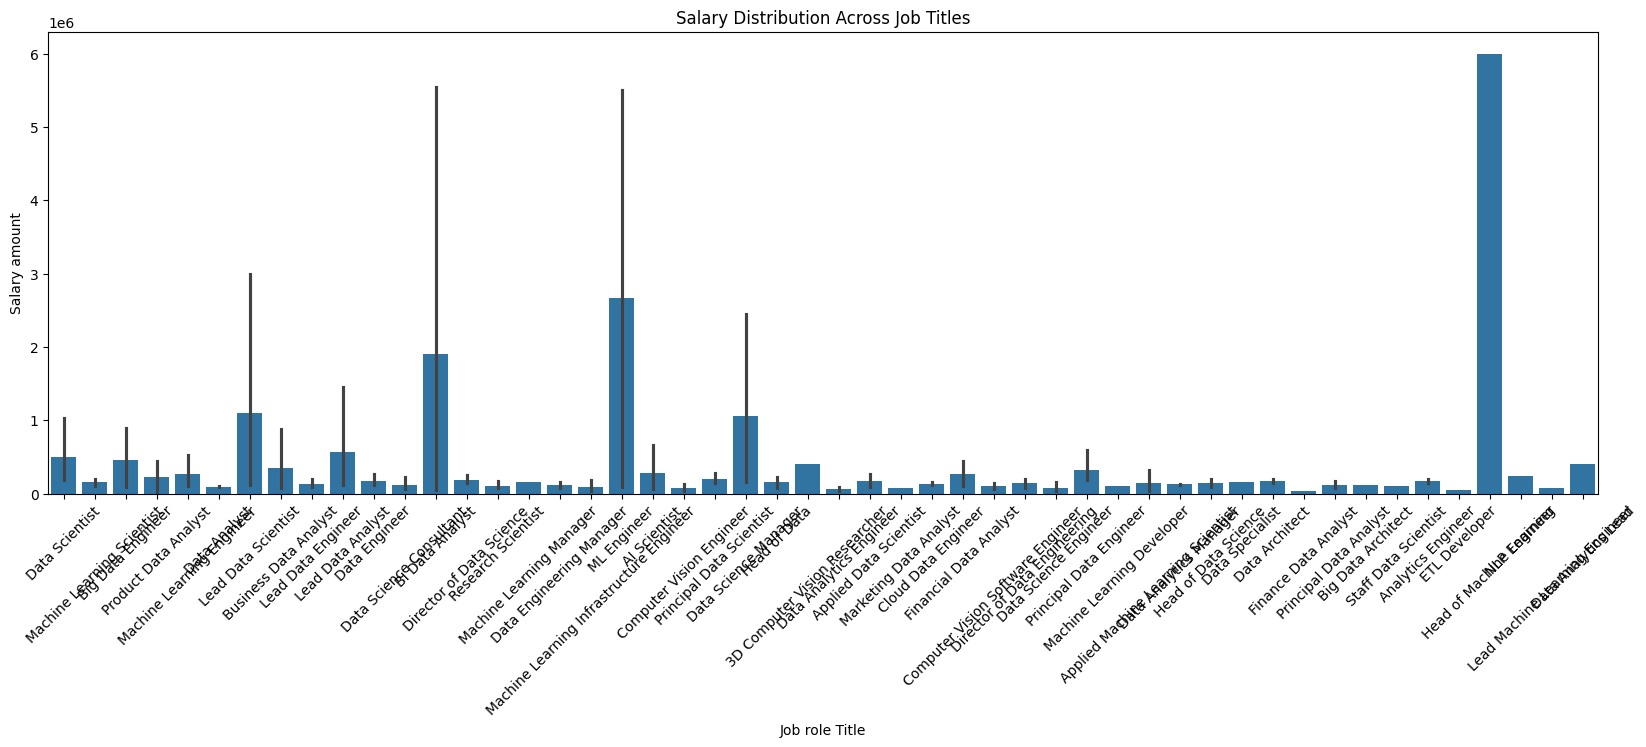

In [30]:
plt.figure(figsize=(20, 6))
sns.barplot(x='job_title', y='salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary Distribution Across Job Titles')
plt.xlabel('Job role Title')
plt.ylabel('Salary amount')
plt.show()

In [34]:
#Salary Distribution based on Experience

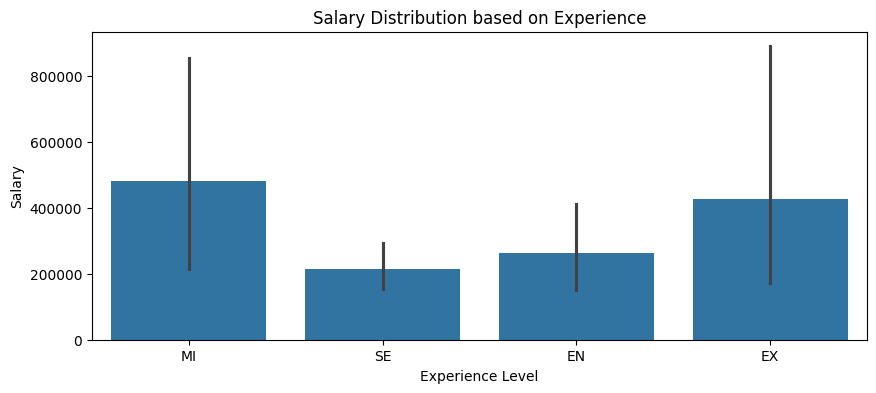

In [39]:
plt.figure(figsize=(10, 4))
sns.barplot(x='experience_level', y='salary', data=df)
plt.title('Salary Distribution based on Experience')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

In [36]:
#Salary Distribution Across Employment Types

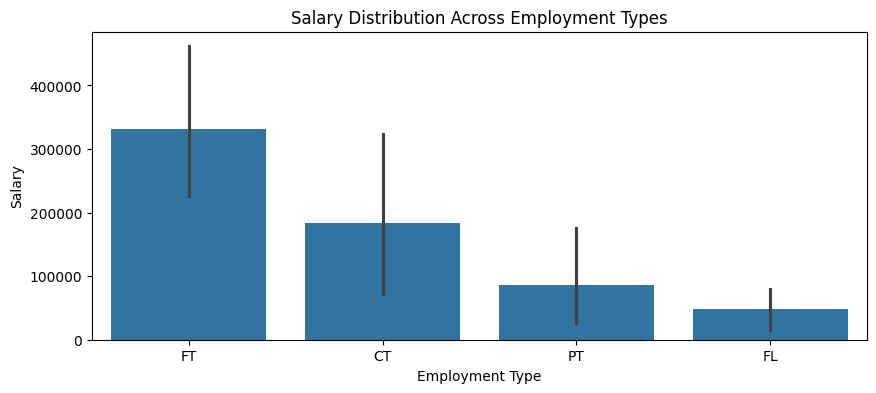

In [38]:
plt.figure(figsize=(10, 4))
sns.barplot(x='employment_type', y='salary', data=df)
plt.title('Salary Distribution Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Salary')
plt.show()

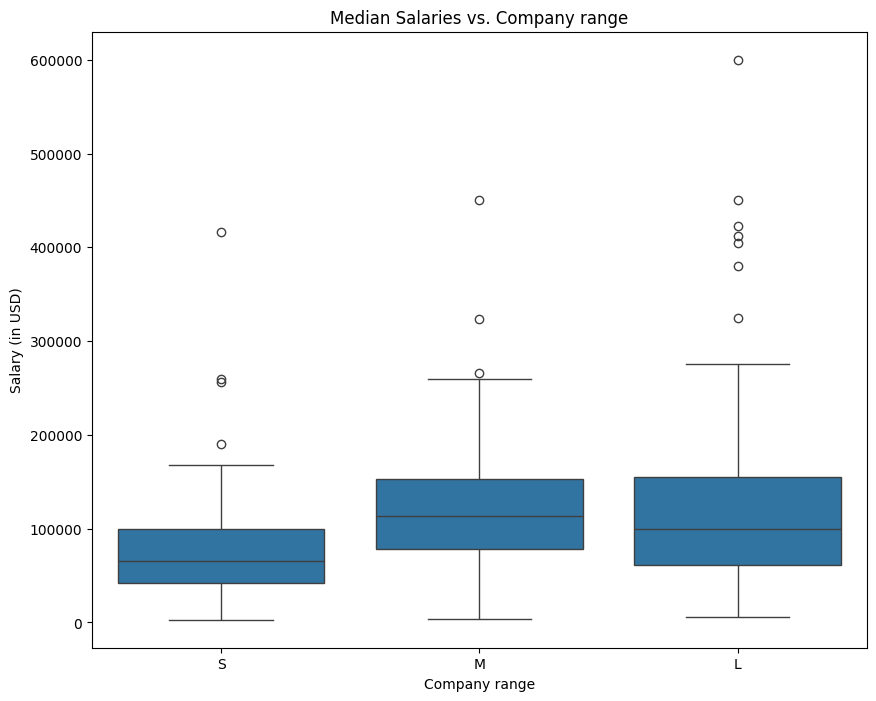

In [48]:
sorted_size = ['S','M','L']
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='company_size', y='salary_in_usd', order=sorted_size)
plt.title('Median Salaries vs. Company range')
plt.xlabel('Company range')
plt.ylabel('Salary (in USD)')
plt.show()

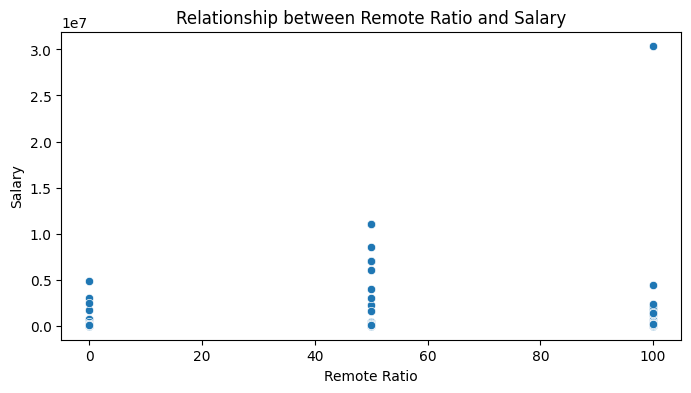

In [41]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='remote_ratio', y='salary', data=df)
plt.title('Relationship between Remote Ratio and Salary')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
plt.show()

In [ ]:
#Relation between remote work percentages and company sizes

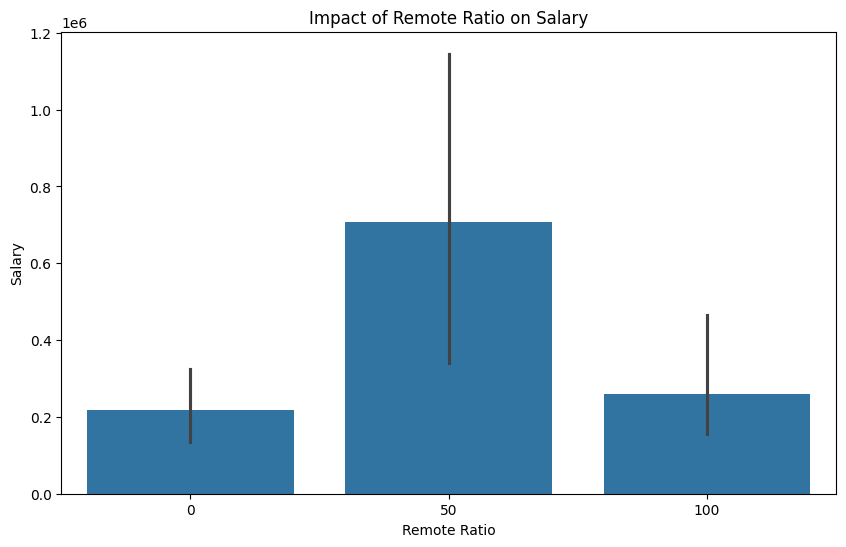

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='remote_ratio', y='salary', data=df)
plt.title('Impact of Remote Ratio on Salary')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
plt.show()

In [51]:
#Feature Engineering: Calculate average salary per job title

In [52]:
avg_salary_per_title = df.groupby('job_title')['salary'].mean().reset_index()
avg_salary_per_title.rename(columns={'salary': 'avg_salary_per_title'}, inplace=True)
df = df.merge(avg_salary_per_title, on='job_title', how='left')

#Feature Engineering: Calculate average salary per experience level

In [53]:
avg_salary_per_exp = df.groupby('experience_level')['salary'].mean().reset_index()
avg_salary_per_exp.rename(columns={'salary': 'avg_salary_per_experience'}, inplace=True)
df = df.merge(avg_salary_per_exp, on='experience_level', how='left')

#Insights and Interpretation¶
The analysis revealed significant variations in salaries across different job titles and experience levels. Senior roles tend to have higher average salaries.
Remote work percentages and company sizes appeared to have limited impact on salary levels.
The predictive model demonstrated a reasonable performance in forecasting salaries, though further refinement may be necessary for higher accuracy.


In [ ]:
#Conclusion
The analysis provides valuable insights into salary trends and factors that may influence compensation in various job roles. Further investigation could explore additional variables and incorporate more advanced predictive modeling techniques for improved accuracy.

For a comprehensive understanding, refer to the visualizations and results presented throughout the report.